## California Houses Price Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score, mean_absolute_error, \
mean_absolute_percentage_error, mean_squared_error

In [4]:
sns.set_theme(rc={'figure.figsize': [15, 11]}, font_scale=1.2)

Data Visualization

In [5]:
#read dataframe
df=pd.read_csv("D:\Python_files\weight_prediction\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
#check missing values
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
#Check duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [9]:
#Check column types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<Axes: >

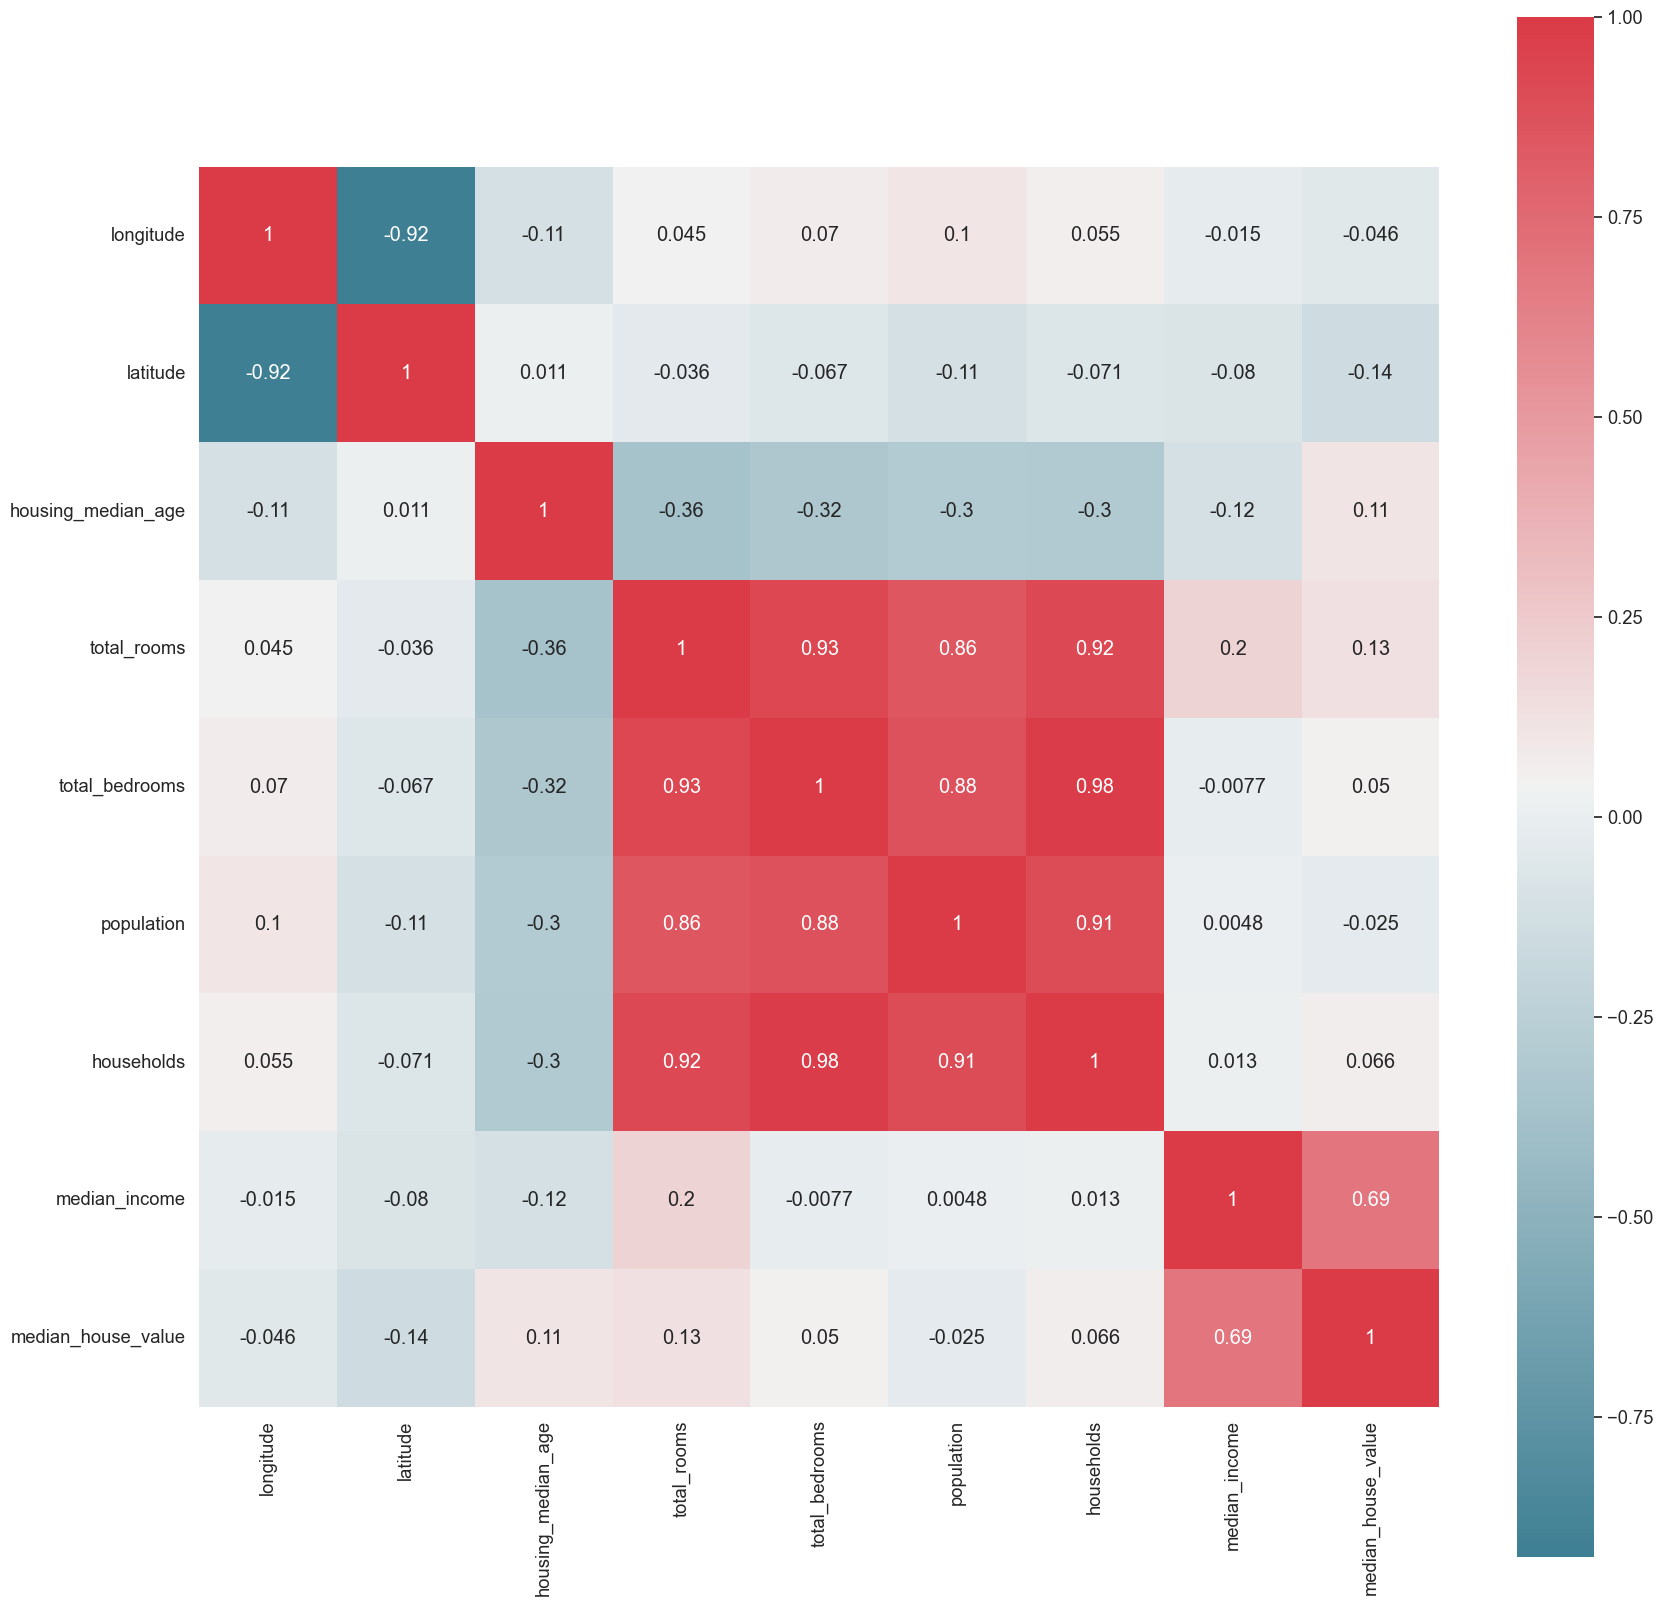

In [12]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.drop('ocean_proximity', axis=1).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [13]:
#count how many null values in each column
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

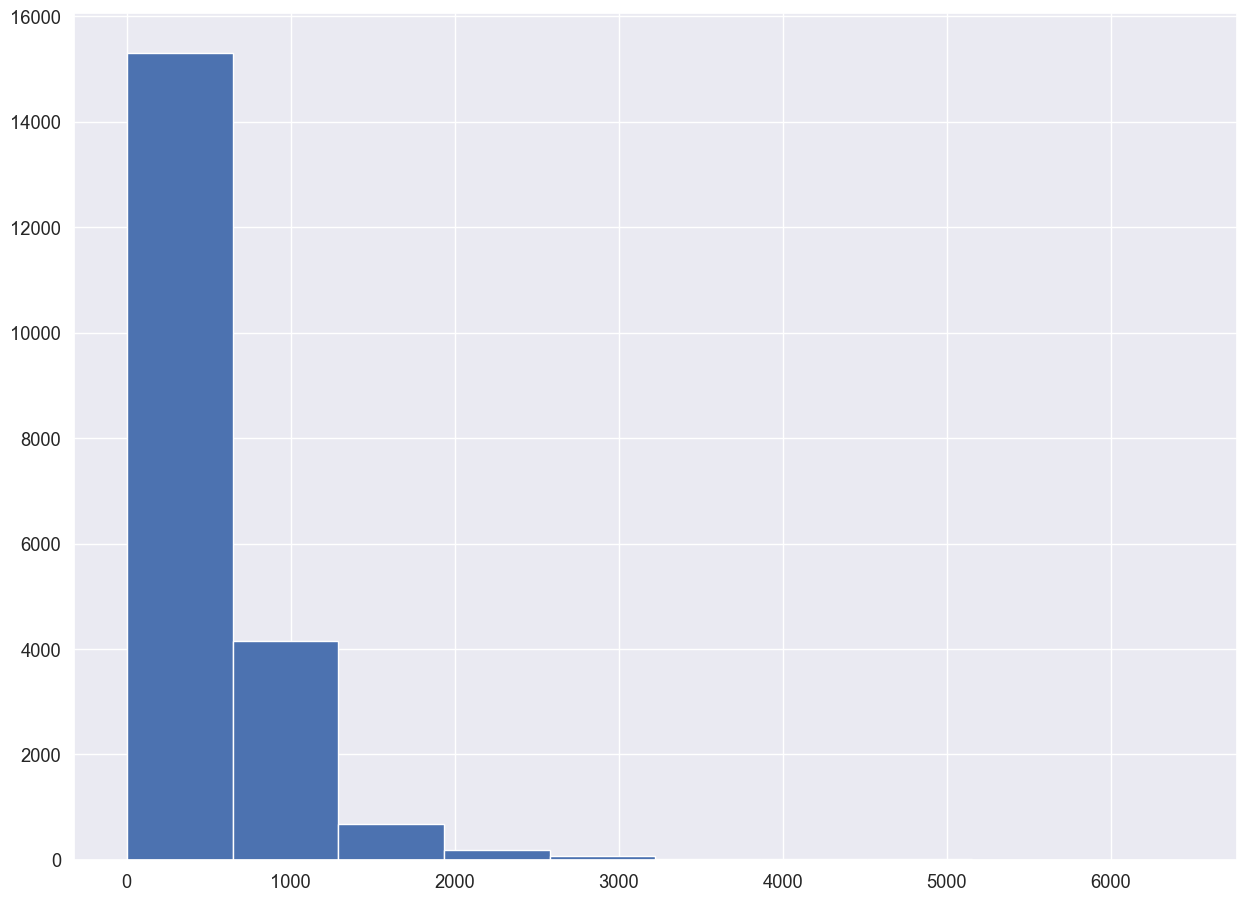

In [14]:
df.total_bedrooms.hist();

In [ ]:
#Fill with median not mean since it is right skewed
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
#df.fillna({'total_bedrooms': df['total_bedrooms'].median()}, inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
#check missing values. We are done!
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


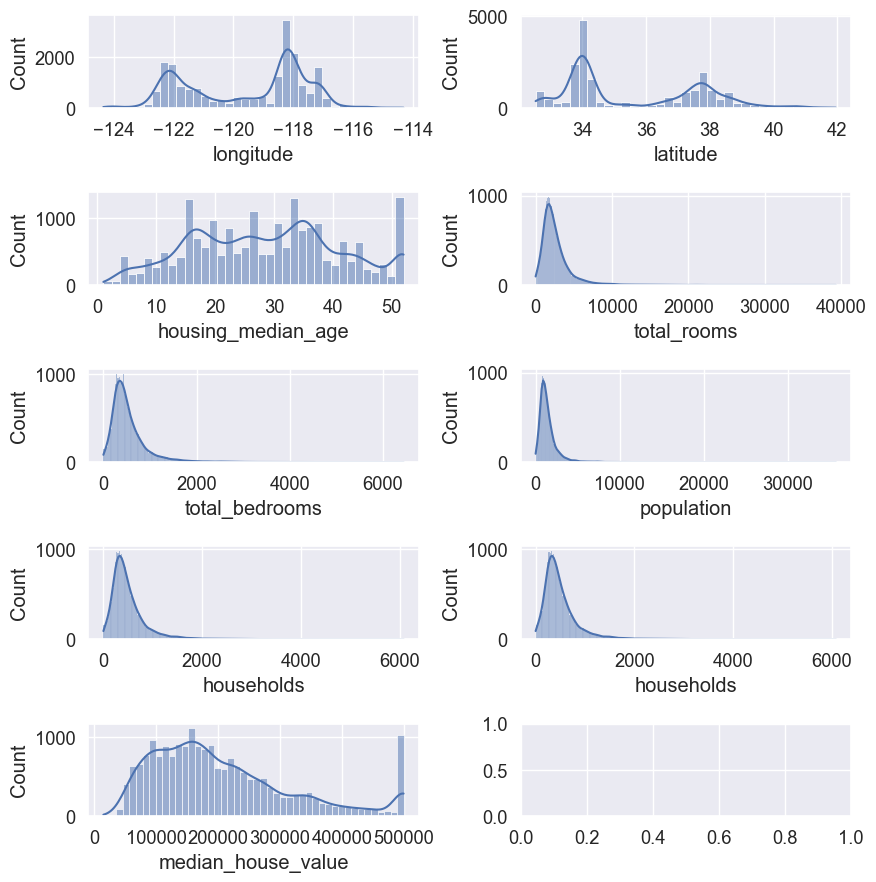

In [20]:
fig, ax = plt.subplots(5, 2, figsize=(9, 9))

sns.histplot(df['longitude'], ax=ax[0, 0], kde=True)
sns.histplot(df['latitude'], ax=ax[0, 1], kde=True)
sns.histplot(df['housing_median_age'], ax=ax[1, 0], kde=True)
sns.histplot(df['total_rooms'], ax=ax[1, 1], kde=True)
sns.histplot(df['total_bedrooms'], ax=ax[2, 0], kde=True)
sns.histplot(df['population'], ax=ax[2, 1], kde=True)
sns.histplot(df['households'], ax=ax[3, 0], kde=True)
sns.histplot(df['households'], ax=ax[3, 1], kde=True)
sns.histplot(df['median_house_value'], ax=ax[4, 0], kde=True)

plt.tight_layout()
plt.show()


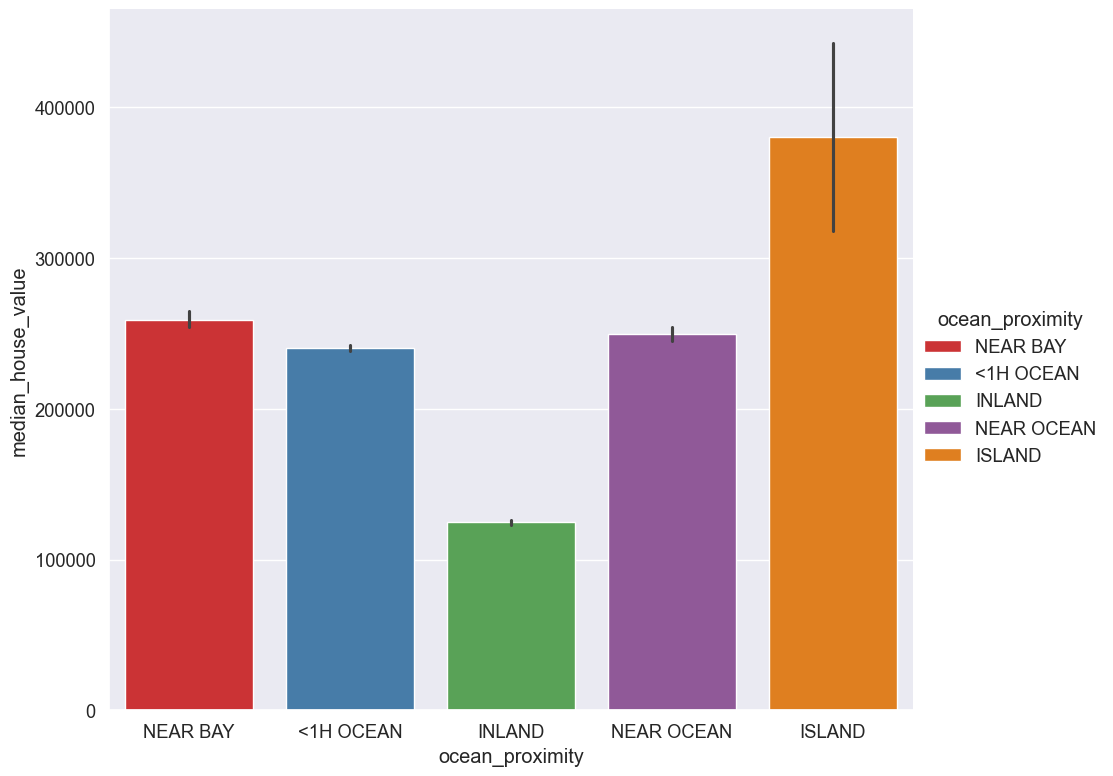

In [24]:
sns.set_theme(rc={'figure.figsize': [20, 20]}, font_scale=1.2)

sns.catplot(
    x='ocean_proximity',
    y='median_house_value',
    kind='bar',
    hue='ocean_proximity',      
    data=df,
    palette="Set1",
    legend=True,                
    height=8,
    aspect=1.2
)



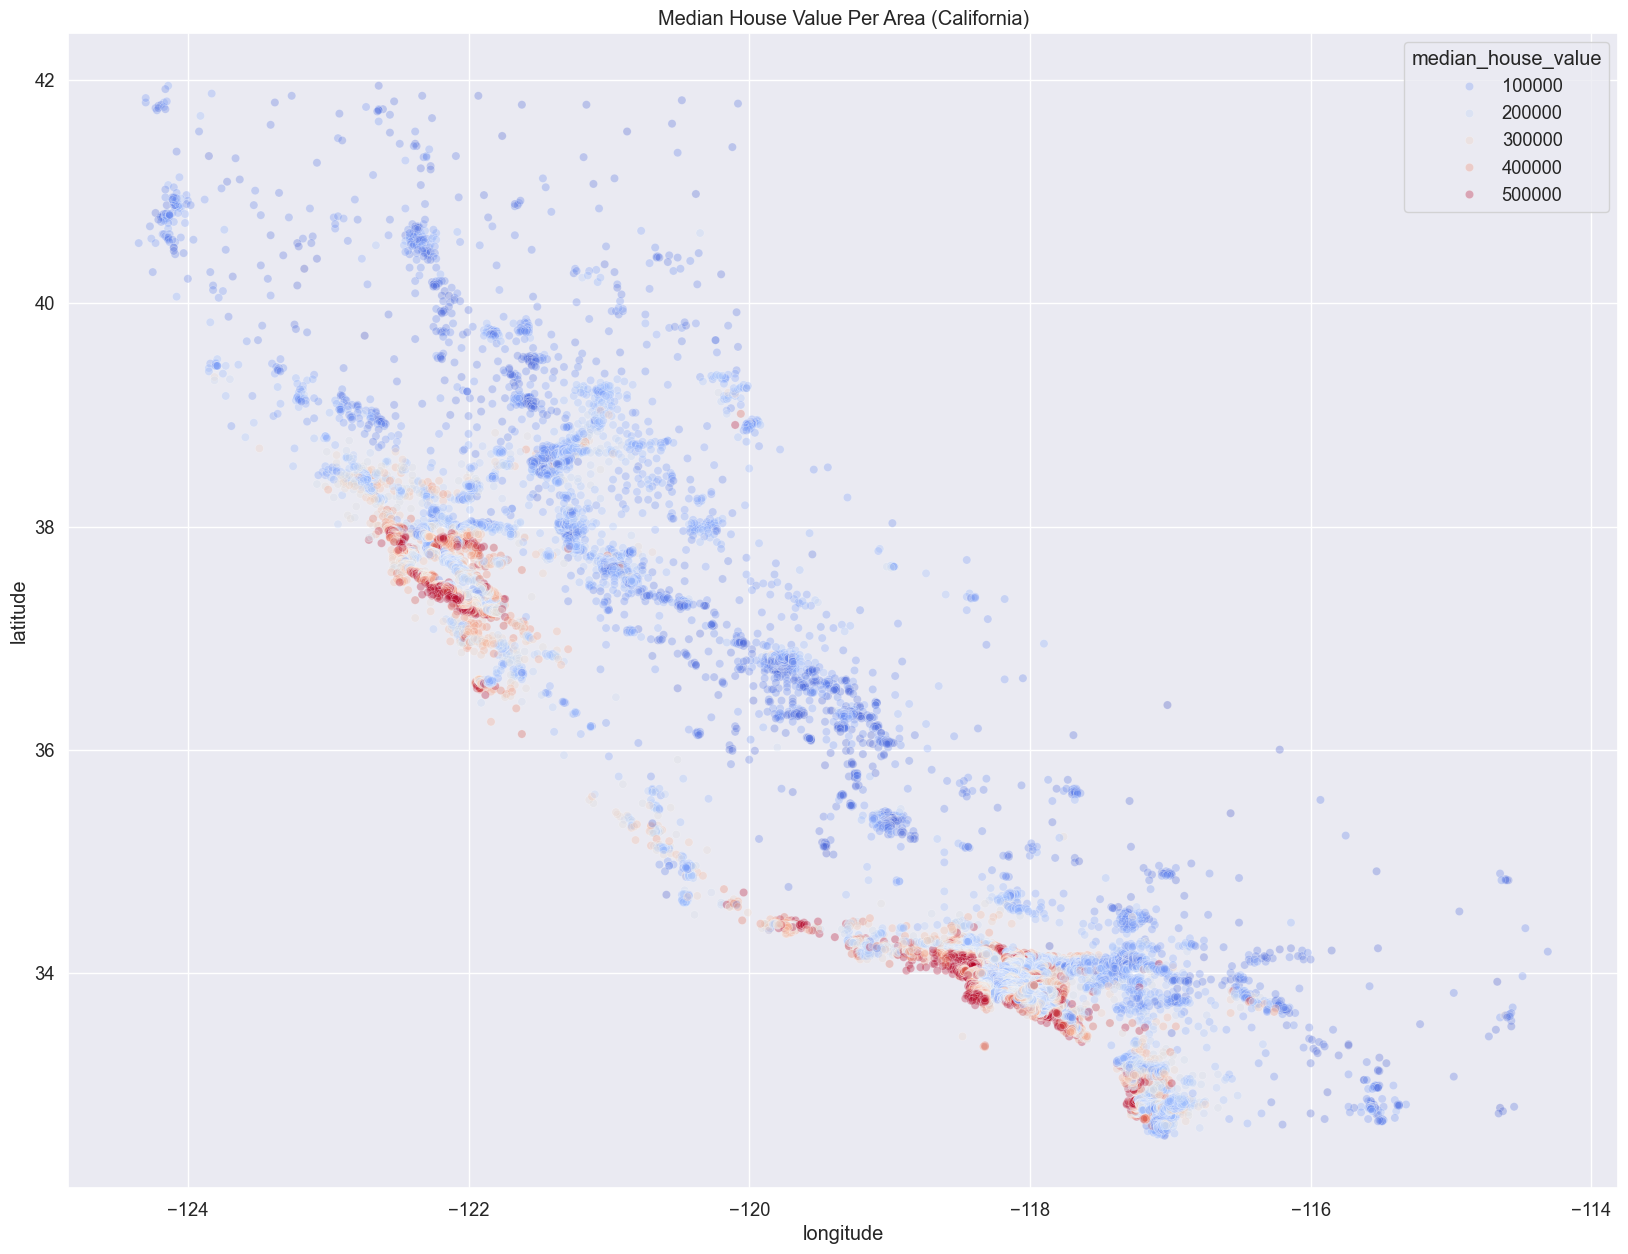

In [25]:
#The location of the household is an important factor in its price, we can see that areas closer to the bay have a higher median price.
sns.set_theme(rc={'figure.figsize': [20, 15]}, font_scale=1.2)
ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.3);
ax.set_title("Median House Value Per Area (California)");

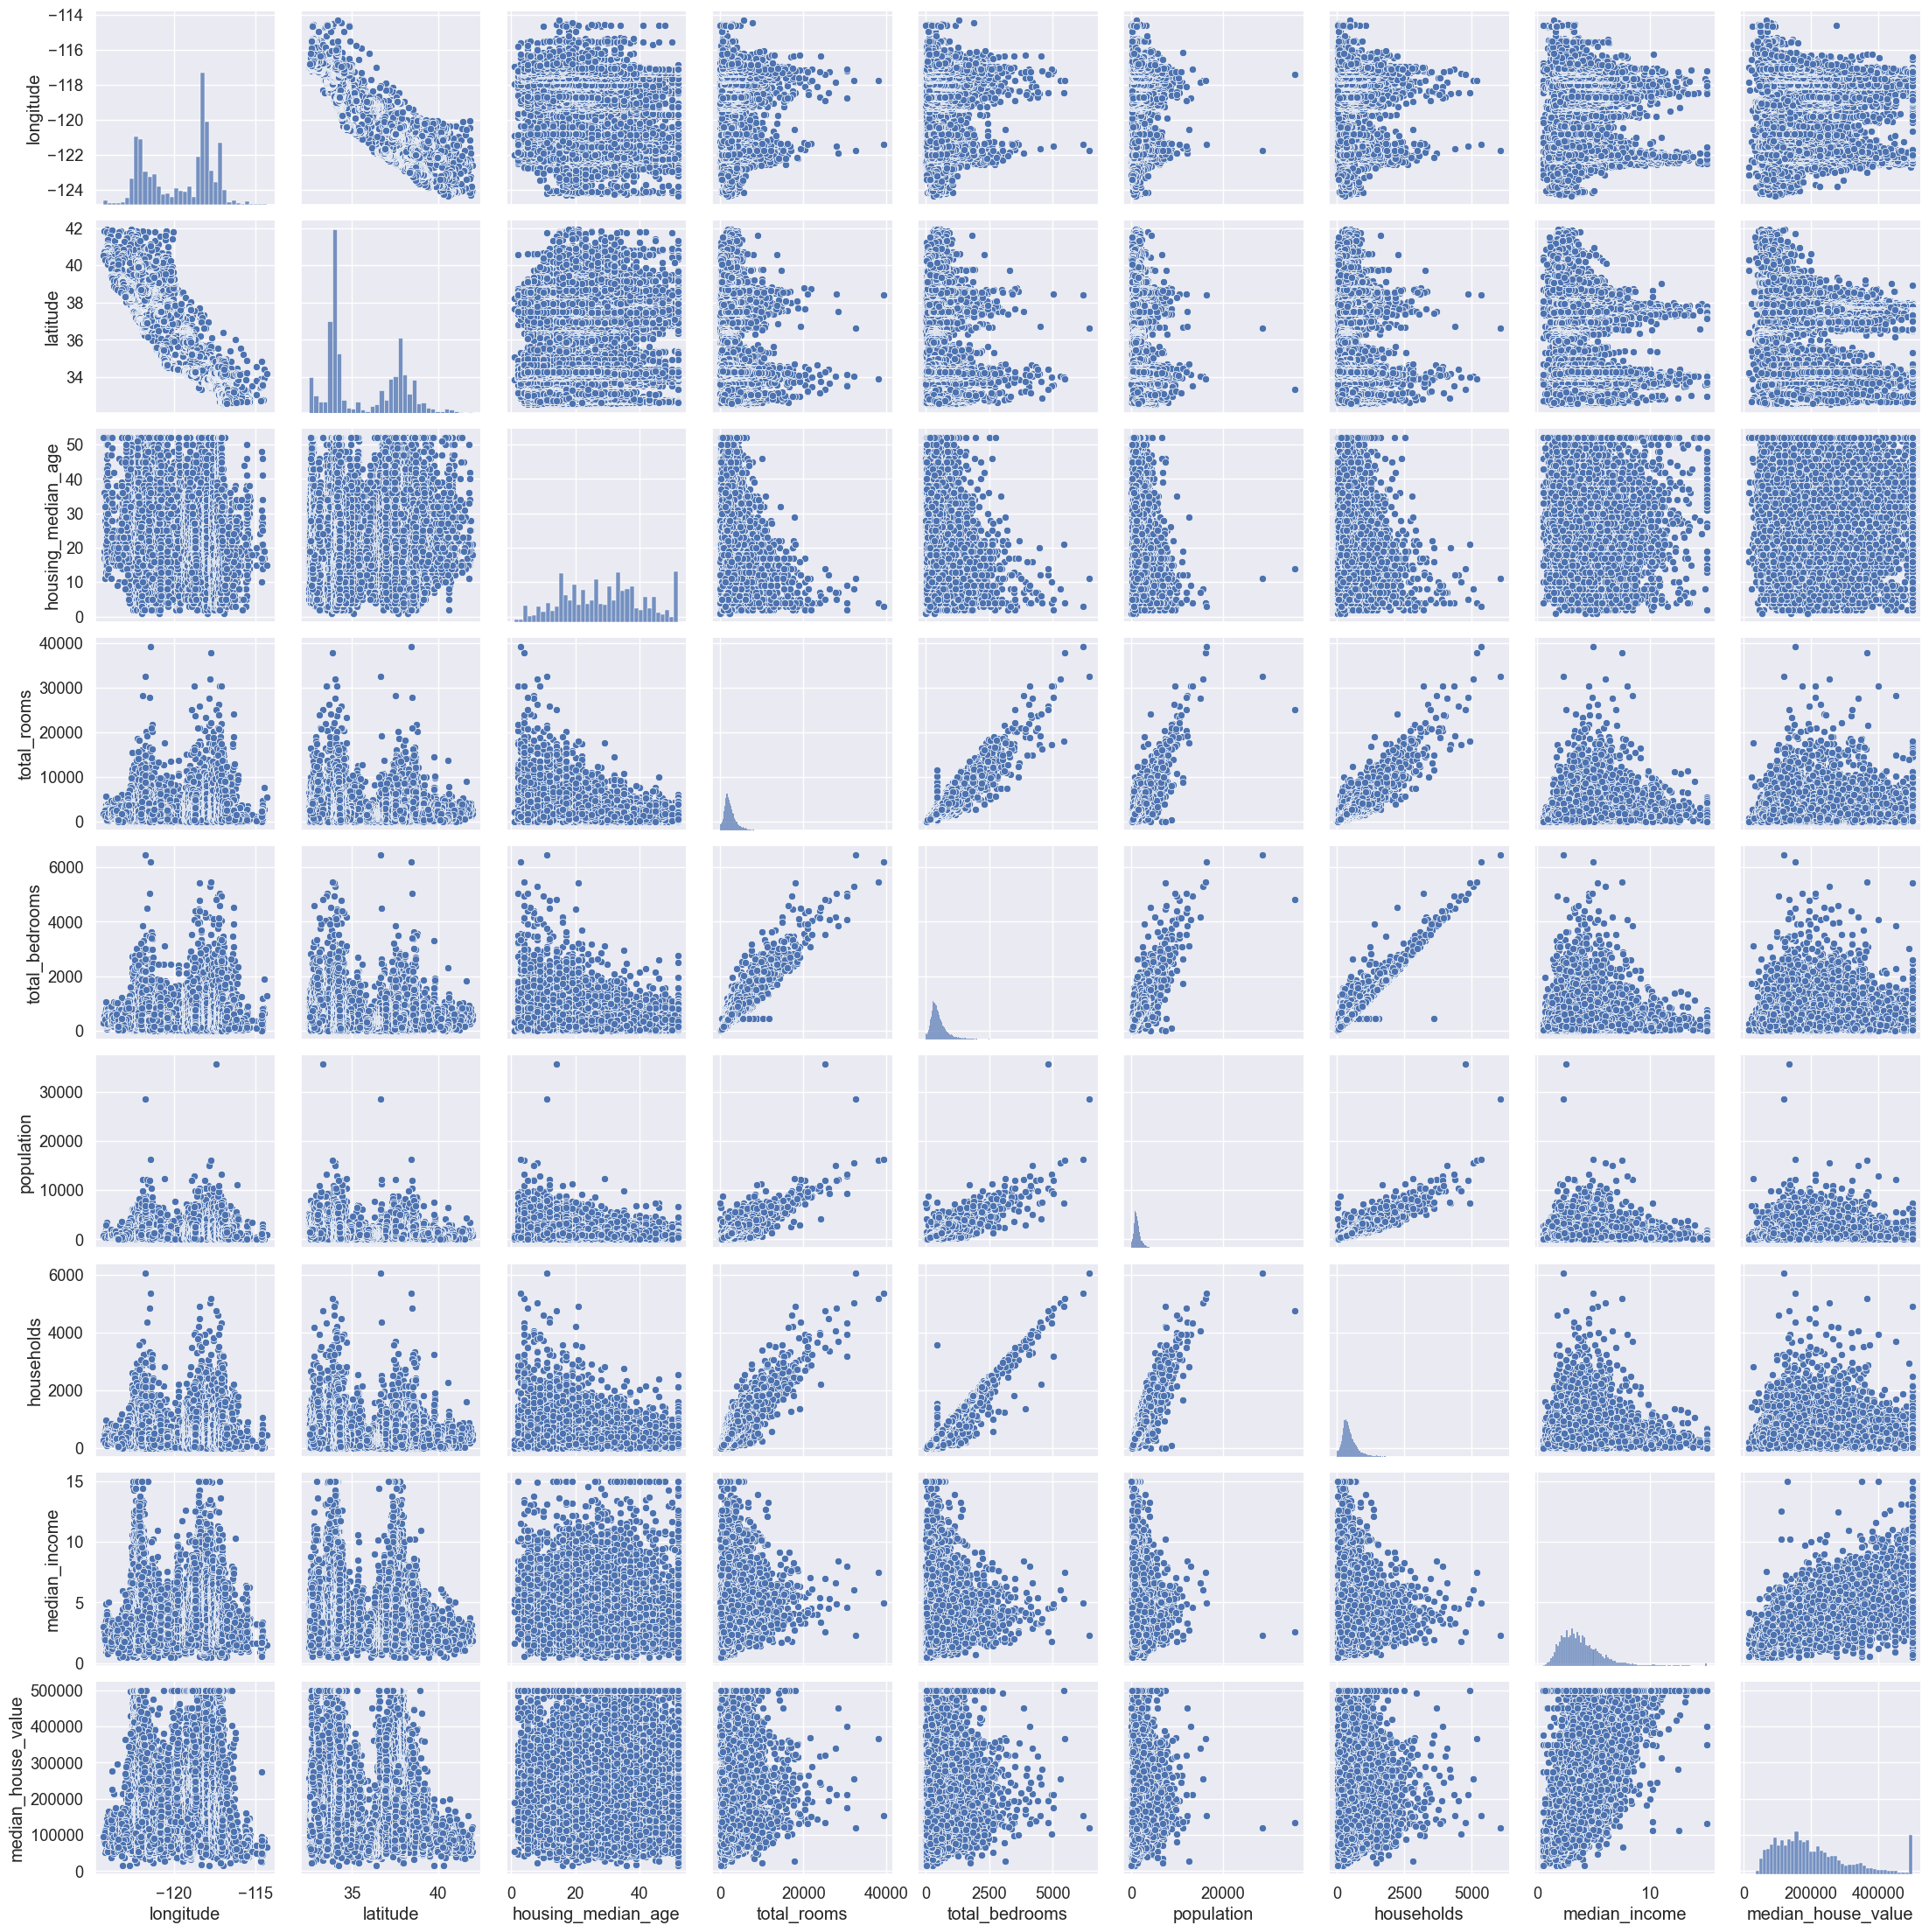

In [ ]:
# A pairplot automatically pairs all numeric columns in the DataFrame and draws a scatterplot matrix for each combination.
# The pairplot function creates a matrix of scatterplots by pairing every numeric feature in the DataFrame.

sns.pairplot(data=df)

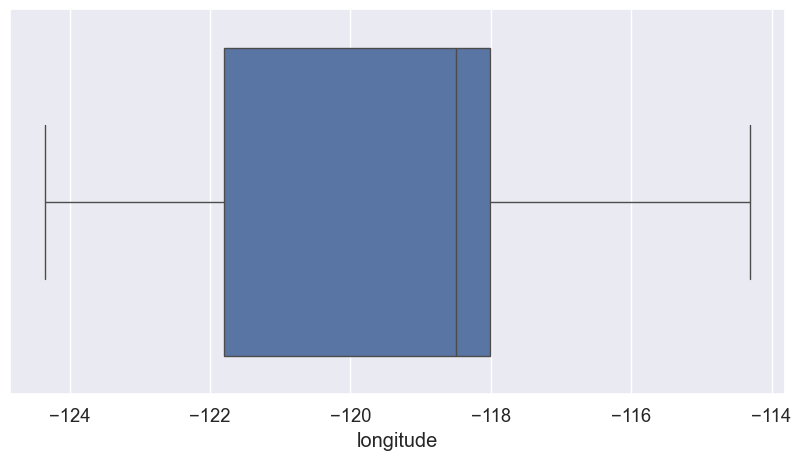

In [33]:
sns.set_theme(rc={'figure.figsize': [10, 5]}, font_scale=1.2)
sns.boxplot(data=df, x="longitude")
plt.show()

# sns.boxplot(data=df,x="latitude")
# sns.boxplot(data=df,x="housing_median_age")
# sns.boxplot(data=df,x="total_rooms")
# sns.boxplot(data=df,x="total_bedrooms")
# sns.boxplot(data=df,x="population")
# sns.boxplot(data=df,x="households")
# sns.boxplot(data=df,x="median_income")
# sns.boxplot(data=df,x="median_house_value")

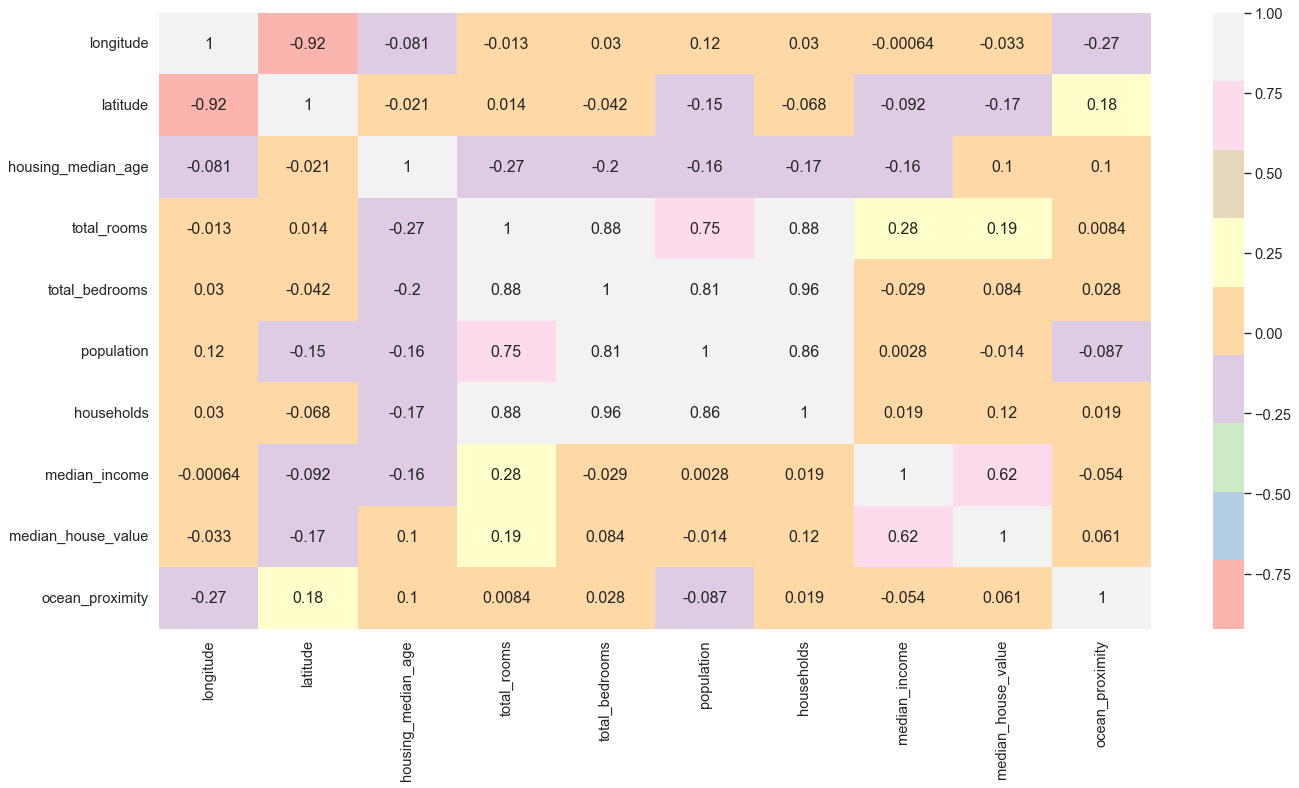

In [38]:
plt.figure(figsize=(20, 10), dpi=80)
sns.heatmap(df.corr(), cmap="Pastel1", annot=True);

Data Preprocessing

In [27]:
# Missing values
# filter out those rows with does not contain any data
df=df.dropna(how='all')

Outliers

In [ ]:
import datasist as ds
from datasist.structdata import detect_outliers

outlier= detect_outliers(df, 0, [ 'total_rooms', 'total_bedrooms', "population", "households", "median_income", "median_house_value" ])
df.drop(outlier, inplace=True)
df.shape

(16473, 10)

Training

In [ ]:
# Prepare the data
le = LabelEncoder()
df.ocean_proximity = le.fit_transform(df.ocean_proximity)

from sklearn.model_selection import train_test_split

x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Model

Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression()
LR.fit(x_train, y_train)
print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_test, y_test)}")

Training R2 score = 0.610278488264858
Test R2 score = 0.6019389136756179


VIF (Variance Inflation Factor)

VIF is a metric used to quantify how strongly a particular feature (column) is linearly correlated with all the other features.

If a feature’s VIF is high (typically > 5 or > 10), it means that this feature can be largely explained by the other features—
in other words, there is redundant information or severe multicollinearity.
This can lead to unstable model coefficients, unclear parameter interpretations, and reduced generalization ability of the linear model.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

XVIF = add_constant(df) # add the intercept to the columns
VIF = pd.Series([variance_inflation_factor(XVIF.values, i) for i in range(XVIF.shape[1])], index=XVIF.columns)
VIF

const                 21816.473076
longitude                11.582830
latitude                 12.138990
housing_median_age        1.244424
total_rooms               9.591285
total_bedrooms           18.691196
population                4.516252
households               20.214152
median_income             3.170229
median_house_value        2.555182
ocean_proximity           1.179522
dtype: float64

In [49]:
# 確認 y 沒被放進 X1
X1 = df.drop(columns=['longitude', 'median_house_value'])  # median_house_value 是 y
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

LR = LinearRegression()
LR.fit(x_train, y_train)

print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_test, y_test)}")

Training R2 score = 0.5359654887337366
Test R2 score = 0.5275848781716395


Lasso

In [51]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=123)
LR = Lasso()
LR.fit(x_train, y_train)

print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_train, y_train)}")

Training R2 score = 0.5339092118762039
Test R2 score = 0.5339092118762039


Ridge

In [52]:
LR = Ridge()
LR.fit(x_train, y_train)
print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_test, y_test)}")

Training R2 score = 0.5339092097709872
Test R2 score = 0.5347331964509763


Evaluation

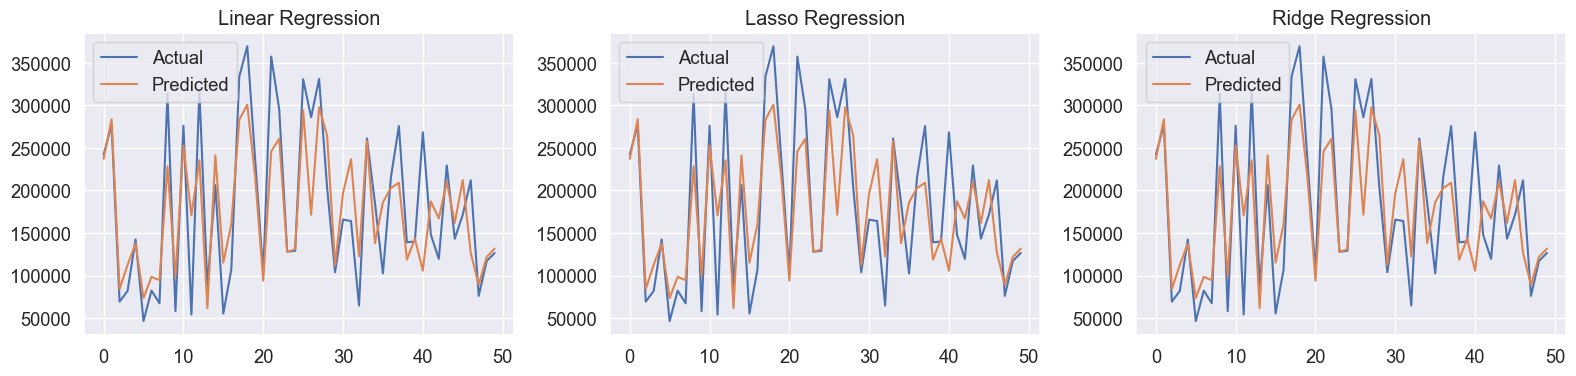

In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

def get_metrics(p, y, y_pred):
    n = len(y)
    r2 = r2_score(y, y_pred)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, adjusted_r2, mae, mape, mse

figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
axes[0].plot(df[:50]); # axes[0].plot(df)
axes[0].set_title("Linear Regression");
axes[0].legend(["Actual", "Predicted"], loc="upper left")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso}).reset_index(drop=True)
axes[1].plot(df[:50]); # axes[0].plot(df)
axes[1].set_title("Lasso Regression");
axes[1].legend(["Actual", "Predicted"], loc="upper left")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge}).reset_index(drop=True)
axes[2].plot(df[:50]); # axes[0].plot(df)
axes[2].set_title("Ridge Regression");
axes[2].legend(["Actual", "Predicted"], loc="upper left")

plt.tight_layout()


In [54]:
p = x_train.shape[1]
pd.DataFrame([
              get_metrics(p, y_test, y_pred),
              get_metrics(p, y_test, y_pred_lasso),
              get_metrics(p, y_test, y_pred_ridge)
             ], 
    columns=['R2', 'Adjusted R2', 'MAE', 'MAPE', 'MSE'],
    index=['Linear Regression', 'Lasso Regression', 'Ridge Regression'])

,R2,Adjusted R2,MAE,MAPE,MSE
Linear Regression,0.534733,0.533978,45609.803908,0.308146,3.567480e+09
Lasso Regression,0.534733,0.533978,45609.882215,0.308147,3.567482e+09
Ridge Regression,0.534733,0.533979,45610.068703,0.308151,3.567479e+09
